In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from itertools import combinations
import numpy as np

In [2]:
named_colors = {
    "black": "#000000",
    "orange": "#e69f00",
    "skyblue": "#56b4e9",
    "bluish green": "#009e73",
    "yellow": "#f0e442",
    "blue": "#0072b2",
    "vermilion": "#d55e00",
    "reddish purple": "#cc79a7",
}
cud_palette = list(named_colors.values())

In [3]:
sns.set_palette(cud_palette)

In [4]:
df = pd.read_csv("../results/estimates/estimates.tsv", sep="\t")
df["abs_relative_error"] = df["relative_error"].abs()
# replace values of inifinity with NaN
# df = df.replace([float("inf"), float("-inf")], float("nan"))
df

,asm_accession,organism,taxid,bioproject,biosample,strain,asm_seq_tech,n_chromosomes,true_size,asm_coverage,...,method,relative_size,relative_error,cpu_time,memory_mb,stats_num_seqs,stats_sum_len,stats_avg_len,stats_median_len,abs_relative_error
0,GCF_040215695.1,[Arthrobacter] sp. ATCC 21022,1771959,PRJNA1116247,SAMN41528051,ATCC 21022,Illumina;ONT,1,4434229,100.0,...,lrge-ava,1.045089,4.508856,15.64,31.98,348527.0,1.000002e+09,2869.2,1839.0,4.508856
1,GCF_040215695.1,[Arthrobacter] sp. ATCC 21022,1771959,PRJNA1116247,SAMN41528051,ATCC 21022,Illumina;ONT,1,4434229,100.0,...,lrge-2set,1.049315,4.931535,15.61,32.02,348527.0,1.000002e+09,2869.2,1839.0,4.931535
2,GCF_040215695.1,[Arthrobacter] sp. ATCC 21022,1771959,PRJNA1116247,SAMN41528051,ATCC 21022,Illumina;ONT,1,4434229,100.0,...,mash,1.188292,18.829226,15.15,381.71,348527.0,1.000002e+09,2869.2,1839.0,18.829226
3,GCF_040215695.1,[Arthrobacter] sp. ATCC 21022,1771959,PRJNA1116247,SAMN41528051,ATCC 21022,Illumina;ONT,1,4434229,100.0,...,genomescope,0.940622,-5.937763,46.16,8166.59,348527.0,1.000002e+09,2869.2,1839.0,5.937763
4,GCF_016889005.1,[Clostridium] scindens,29347,PRJNA231221,SAMN16357369,FDAARGOS_1227,Illumina;PacBio,1,3619096,1116.1,...,lrge-ava,1.232446,23.244589,20.41,1814.95,134076.0,1.000001e+09,7458.5,7881.0,23.244589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13855,GCF_026183365.1,Yersinia sp. SCPM-O-B-9106 (C-191),2992843,PRJNA269675,SAMN31564381,SCPM-O-B-9106 (C-191),Other;ONT,1,4417639,172.5,...,genomescope,0.946140,-5.385999,20.43,2476.81,47776.0,2.951364e+08,6177.5,1976.0,5.385999
13856,GCF_004353525.1,Zhaonella formicivorans,2528593,PRJNA523471,SAMN10977731,K32,ONT,1,3314304,400.0,...,lrge-ava,1.059135,5.913459,134.43,3019.85,105538.0,1.000004e+09,9475.3,6568.0,5.913459
13857,GCF_004353525.1,Zhaonella formicivorans,2528593,PRJNA523471,SAMN10977731,K32,ONT,1,3314304,400.0,...,lrge-2set,1.048742,4.874228,22.31,29.93,105538.0,1.000004e+09,9475.3,6568.0,4.874228
13858,GCF_004353525.1,Zhaonella formicivorans,2528593,PRJNA523471,SAMN10977731,K32,ONT,1,3314304,400.0,...,mash,2.484603,148.460310,47.44,1449.80,105538.0,1.000004e+09,9475.3,6568.0,148.460310


In [5]:
# check there are no values of infinity
assert not df.isin([float("inf"), float("-inf")]).any().any()

In [6]:
label_mapping = {"OXFORD_NANOPORE": "ONT", "PACBIO_SMRT": "PacBio"}

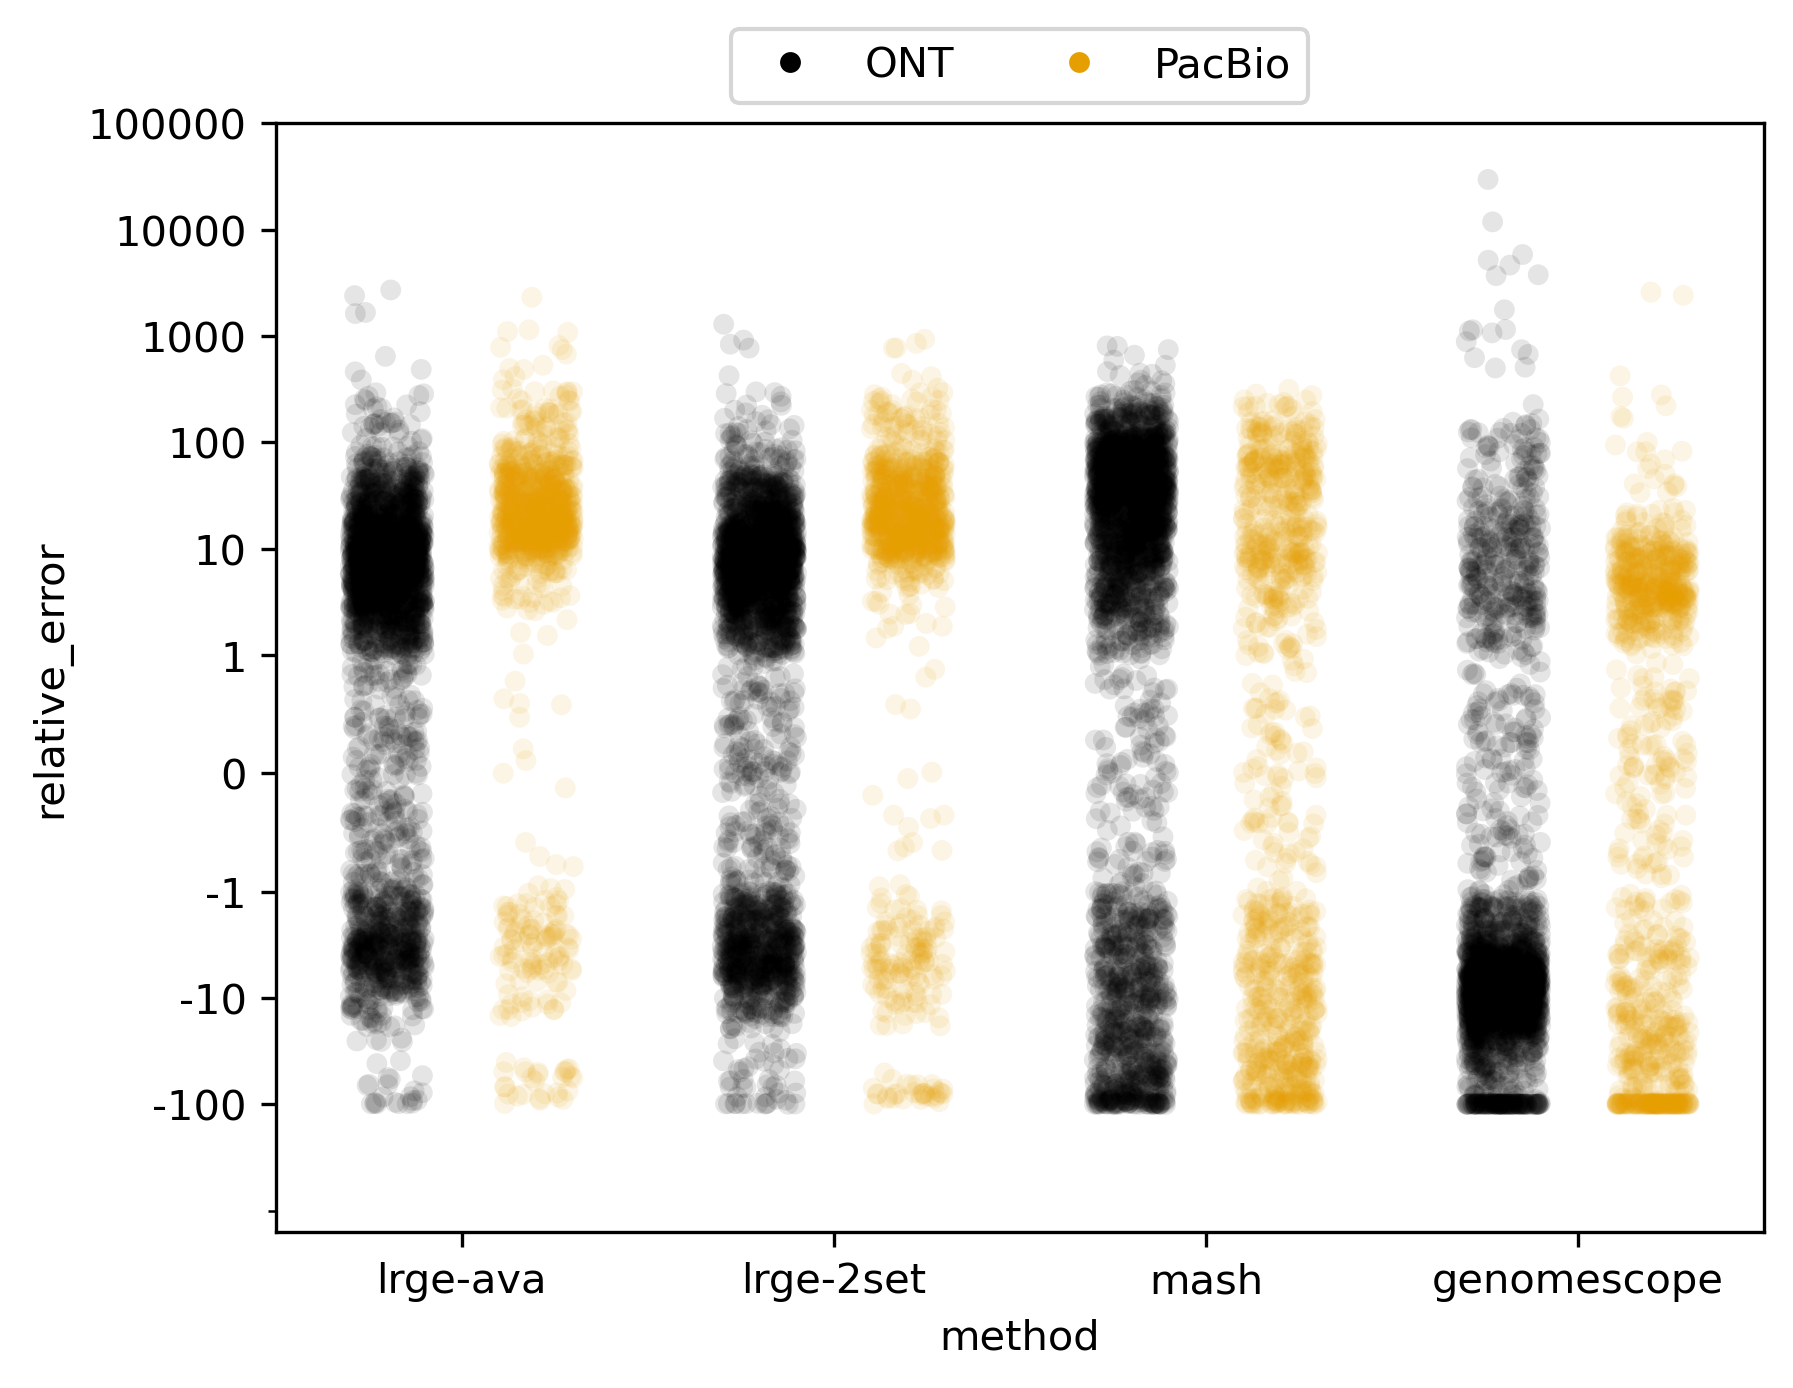

In [7]:
fig, ax = plt.subplots(dpi=300)
x = "method"
y = "relative_error"
hue = "platform"
data = df
# sns.boxplot(x=x, y=y, hue=hue, data=data, ax=ax, fill=False, fliersize=0, gap=0.1)
# sns.violinplot(x=x, y=y, hue=hue, data=data, ax=ax, fill=False, linewidth=1, scale="width")
sns.stripplot(x=x, y=y, hue=hue, data=data, ax=ax, dodge=True, alpha=0.1, jitter=0.2)
ax.set_yscale("symlog", linthresh=1)
yticks = [-100, -10, -1, 0, 1, 10, 100, 1000, 10000, 100000]
ax.set_yticks(yticks)
ax.set_yticklabels(yticks)

# make the markers larger and less transparent in the legend
handles, labels = ax.get_legend_handles_labels()
for handle in handles:
    handle.set_markersize(5)
    handle.set_alpha(1)

labels = [label_mapping.get(label, label) for label in labels]

ax.legend(
    handles,
    labels,
    loc="lower center",
    bbox_to_anchor=(0.5, 1),
    ncol=2,
    title="",
    alignment="center",
)

/var/folders/bp/zbbdn_091x1_34h2k7b9nszm0000gn/T/ipykernel_31742/3207729266.py:7: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.scatterplot(x=x, y=y, hue=hue, data=data, ax=ax, alpha=0.1, palette=cud_palette)


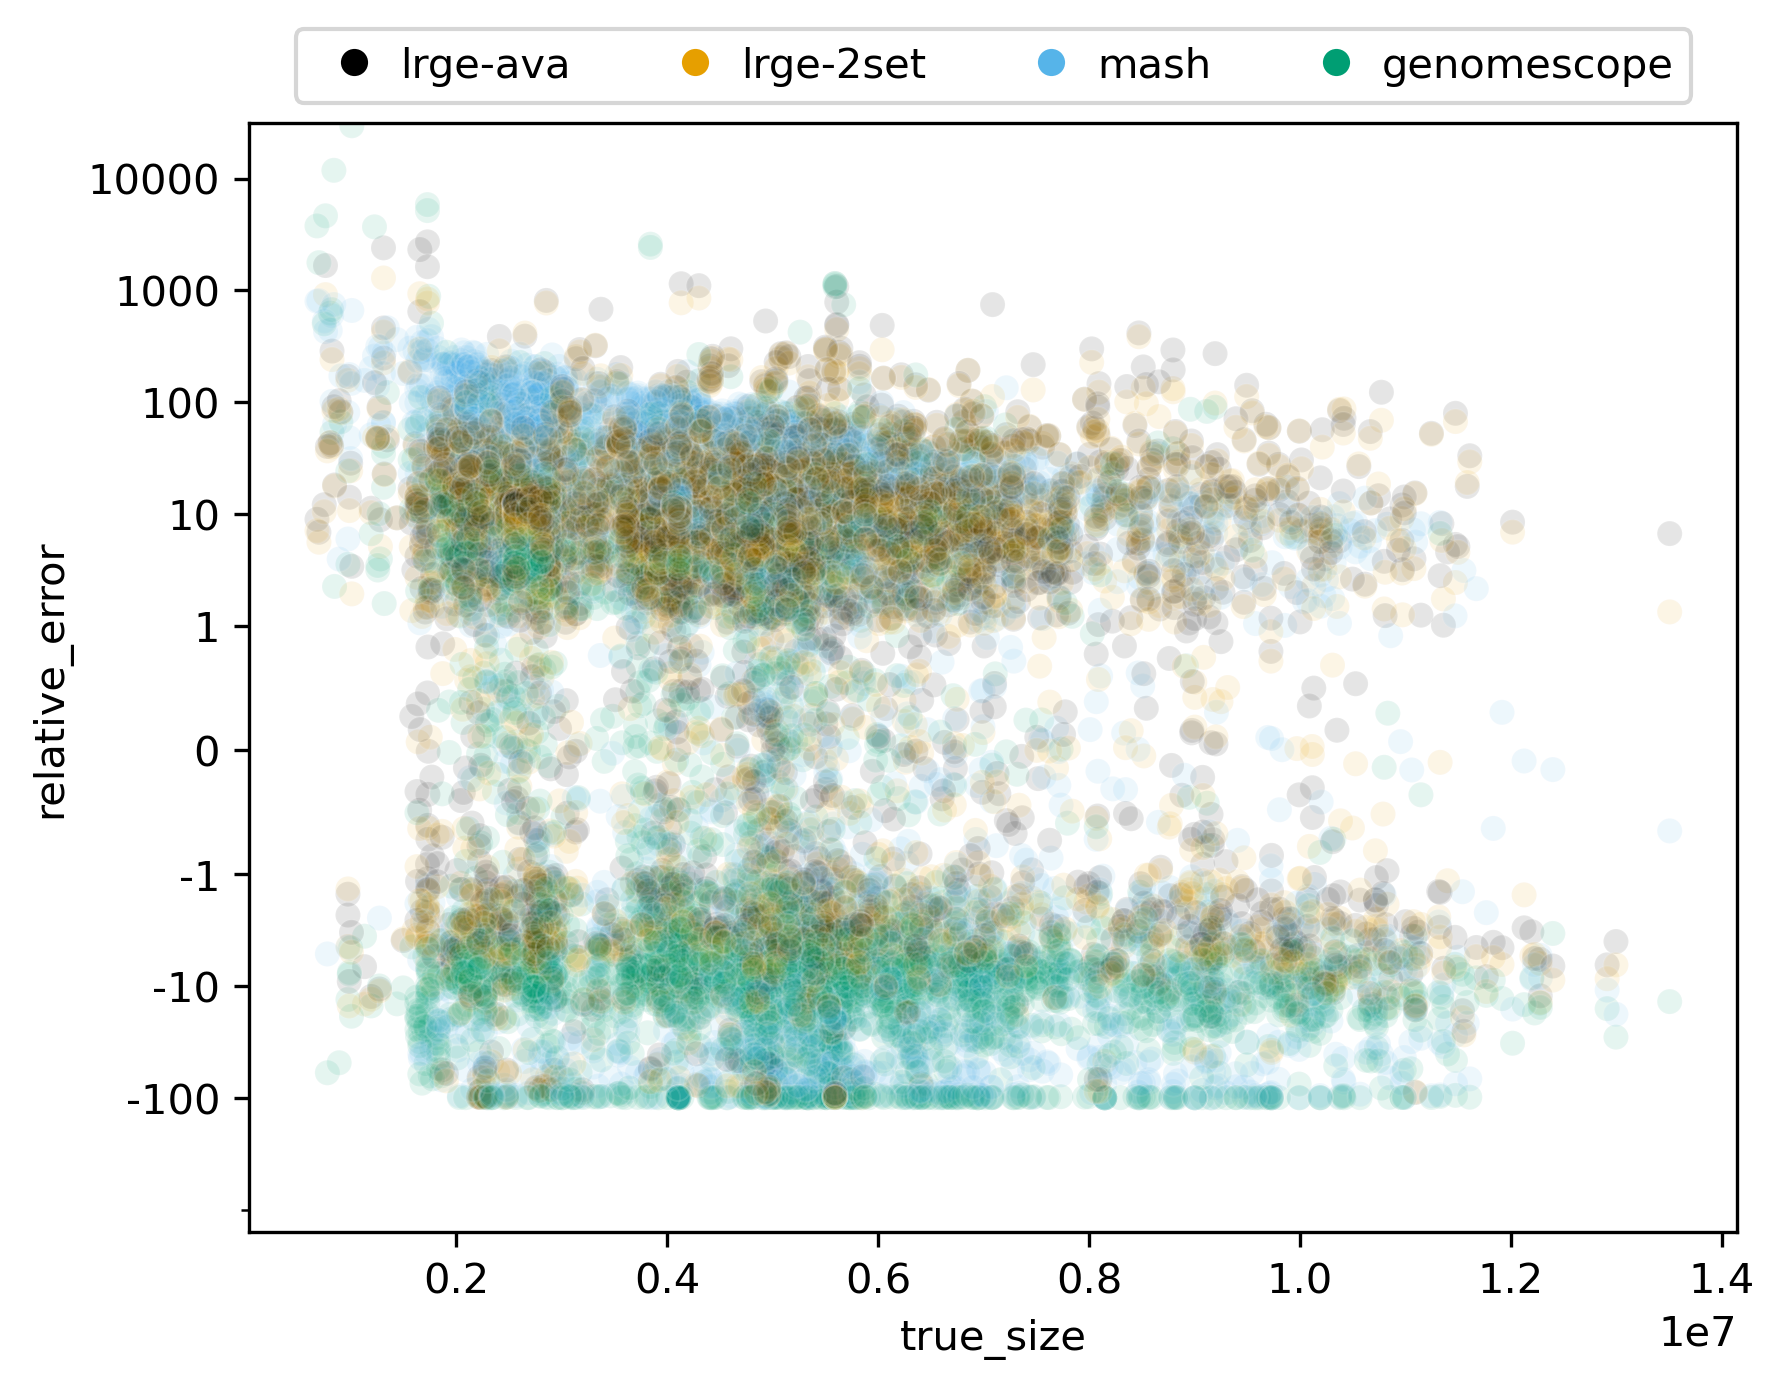

In [8]:
x = "true_size"
y = "relative_error"
style = "platform"
hue = "method"
data = df
fig, ax = plt.subplots(dpi=300)
sns.scatterplot(x=x, y=y, hue=hue, data=data, ax=ax, alpha=0.1, palette=cud_palette)
yticks = [-100, -10, -1, 0, 1, 10, 100, 1000, 10000]
ax.set_yscale("symlog", linthresh=1)
ax.set_yticks(yticks)
ax.set_yticklabels(yticks)

# make the markers larger and less transparent in the legend
handles, labels = ax.get_legend_handles_labels()
for handle in handles:
    handle.set_markersize(7)
    handle.set_alpha(1)

ax.legend(
    handles,
    labels,
    loc="lower center",
    bbox_to_anchor=(0.5, 1),
    ncol=4,
    title="",
    alignment="center",
    handletextpad=0.1,
)

In [9]:
df.groupby(["method", "platform"])["abs_relative_error"].describe()

count       mean         std       min  \
method      platform                                                   
genomescope OXFORD_NANOPORE  2508.0  47.322070  674.669503  0.002712   
            PACBIO_SMRT       957.0  30.010156  119.864180  0.010475   
lrge-2set   OXFORD_NANOPORE  2508.0  14.340773   45.779145  0.002785   
            PACBIO_SMRT       957.0  38.374576   71.393626  0.010580   
lrge-ava    OXFORD_NANOPORE  2508.0  16.931233   91.172848  0.001718   
            PACBIO_SMRT       957.0  44.931095  119.133951  0.001921   
mash        OXFORD_NANOPORE  2508.0  43.853153   61.024470  0.002574   
            PACBIO_SMRT       957.0  35.585541   44.969044  0.001583   

                                   25%        50%        75%           max  
method      platform                                                        
genomescope OXFORD_NANOPORE   4.768349   8.466745  15.875091  29701.234129  
            PACBIO_SMRT       2.804458   6.399239  26.969096   2590.665705  
lrge-2set   OXFORD_NANOPORE   2.634456   5.863666  12.511359   1292.025368  
            PACBIO_SMRT       9.853853  18.287089  40.243755    933.540755  
lrge-ava    OXFORD_NANOPORE   2.535782   5.779528  12.375092   2716.444118  
            PACBIO_SMRT      11.195753  18.858685  40.310717   2319.778867  
mash        OXFORD_NANOPORE   6.850385  24.682718  61.453303    809.168946  
            PACBIO_SMRT       4.290932  15.378230  55.887939    316.071620

In [10]:
# do an ANOVA to test if the means are different for the different methods on each platform

# this list will contain the results of the Tukey HSD test for those platforms where the ANOVA test is significant
# the format of each element is ((hue, x), (hue, x), pval) where the first two elements are the pairs of means that are
# significantly different and the third element is the p-value of the test
annotations = []

for platform in df["platform"].unique():
    print(f"{'=' * 30}\nPlatform: {platform}\n{'=' * 30}")
    for method in df["method"].unique():
        # print(f"Method: {method}")
        data = df[(df["platform"] == platform) & (df["method"] == method)]["abs_relative_error"]
        # print(data.describe())
    f, p = f_oneway(
        *[df[(df["platform"] == platform) & (df["method"] == method)]["abs_relative_error"] for method in df["method"].unique()]
    )
    print(f"ANOVA: f={f}, p={p}")
    if p < 0.05:
        print("Means are significantly different")
        tukey = pairwise_tukeyhsd(
            df[(df["platform"] == platform)]["abs_relative_error"], df[(df["platform"] == platform)]["method"]
        )
        print(tukey.summary())
        for i, tup in enumerate(combinations(tukey.groupsunique, 2)):
            if not tukey.reject[i]:
                continue
            pval = float(tukey.pvalues[i])
            annotations.append(((tup[0], platform), (tup[1], platform), pval))
    else:
        print("Means are not significantly different")

Platform: OXFORD_NANOPORE
ANOVA: f=6.458909447944773, p=0.00023042894129927997
Means are significantly different
     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
   group1     group2  meandiff p-adj   lower    upper  reject
-------------------------------------------------------------
genomescope lrge-2set -32.9813 0.0036 -57.8352 -8.1274   True
genomescope  lrge-ava -30.3908 0.0091 -55.2447  -5.537   True
genomescope      mash  -3.4689 0.9842 -28.3228 21.3849  False
  lrge-2set  lrge-ava   2.5905 0.9933 -22.2634 27.4443  False
  lrge-2set      mash  29.5124 0.0122   4.6585 54.3662   True
   lrge-ava      mash  26.9219 0.0276   2.0681 51.7758   True
-------------------------------------------------------------
Platform: PACBIO_SMRT
ANOVA: f=4.128709664517633, p=0.006223996665235567
Means are significantly different
     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
   group1     group2  meandiff p-adj   lower    upper  reject
------------------------------------

In [24]:
def pvalue_to_asterisks(pvalue):
    if pvalue <= 0.0001:
        return "****"
    elif pvalue <= 0.001:
        return "***"
    elif pvalue <= 0.01:
        return "**"
    elif pvalue <= 0.05:
        return "*"
    else:
        return "ns"

Text(0.5, 0, '')

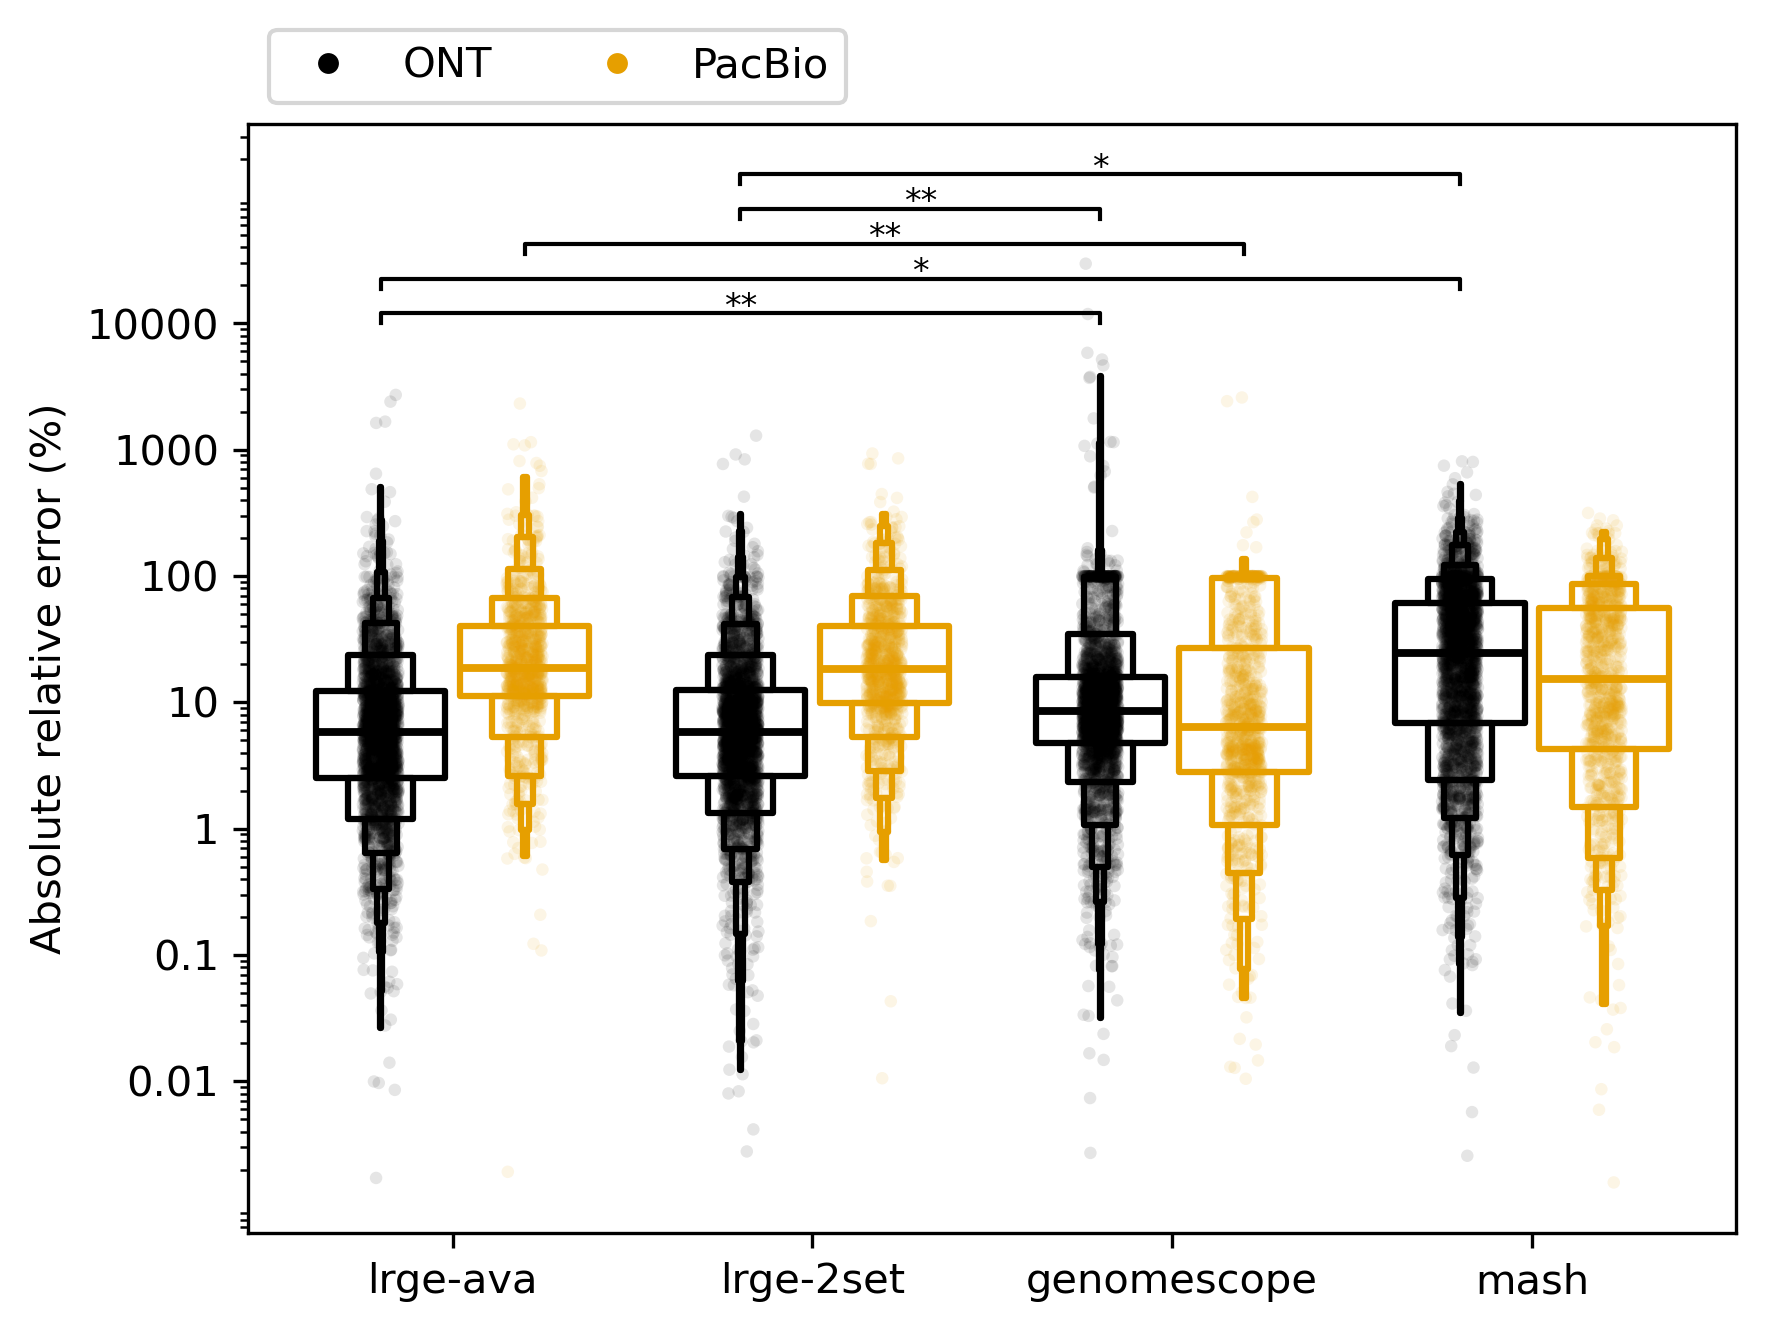

In [123]:
fig, ax = plt.subplots(dpi=300)
x = "method"
y = "abs_relative_error"
hue = "platform"
data = df

order = ["lrge-ava", "lrge-2set", "genomescope", "mash"]
hue_order = sorted(data[hue].unique())

sns.stripplot(
    x=x,
    y=y,
    hue=hue,
    data=data,
    ax=ax,
    dodge=True,
    alpha=0.1,
    jitter=0.1,
    order=order,
    hue_order=hue_order,
    size=3,
)
sns.boxenplot(
    x=x,
    y=y,
    hue=hue,
    data=data,
    ax=ax,
    fill=False,
    showfliers=False,
    gap=0.1,
    legend=False,
    order=order,
    hue_order=hue_order,
)

ax.set_yscale("log")
yticks = [0.01, 0.1, 1, 10, 100, 1000, 10000]
ax.set_yticks(yticks)
ax.set_yticklabels(yticks)

# statistical annotations
args = []
for i, ((m1, platform), (m2, _), pval) in enumerate(annotations):
    m1_x = order.index(m1)
    m2_x = order.index(m2)
    platform_ix = hue_order.index(platform)
    offset = -0.2 if platform_ix == 0 else 0.2
    x1, x2 = sorted([m1_x + offset, m2_x + offset])

    col = "black"
    annot = pvalue_to_asterisks(pval)

    args.append((x1, x2, col, annot))

annot_ys = np.logspace(4, 5.1, num=len(annotations), base=10)
for i, (x1, x2, col, annot) in enumerate(sorted(args)):
    bracket_y = annot_ys[i]
    h = 0.2 * bracket_y
    ax.plot(
        [x1, x1, x2, x2],
        [bracket_y, bracket_y + h, bracket_y + h, bracket_y],
        lw=1,
        c=col,
    )
    ax.text((x1 + x2) * 0.5, bracket_y, annot, ha="center", va="bottom", color=col, fontsize=8)


# make the markers larger and less transparent in the legend
handles, labels = ax.get_legend_handles_labels()
for handle in handles:
    handle.set_markersize(5)
    handle.set_alpha(1)

labels = [label_mapping.get(label, label) for label in labels]

ax.legend(
    handles,
    labels,
    loc="lower left",
    bbox_to_anchor=(0, 1),
    ncol=2,
    title="",
    alignment="center",
)
ax.set_ylabel("Absolute relative error (%)")
ax.set_xlabel("")

In [122]:
np.logspace(4, 5.1, num=len(annotations))

array([ 10000.        ,  18836.4908949 ,  35481.33892336,  66834.39175686,
       125892.54117942])

In [69]:
annotations = []
platform = "PACBIO_SMRT"
for i, tup in enumerate(combinations(tukey.groupsunique, 2)):
    if not tukey.reject[i]:
        continue
    pval = tukey.pvalues[i]
    annotations.append([(tup[0], platform), (tup[1], platform), pval])

In [70]:
annotations

[[('genomescope', 'PACBIO_SMRT'),
  ('lrge-ava', 'PACBIO_SMRT'),
  np.float64(0.0031110156628073593)]]

In [68]:
tukey.reject

array([False,  True, False, False, False, False])

In [46]:
dir(tukey)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_multicomp',
 '_results_table',
 '_simultaneous_ci',
 'confint',
 'data',
 'df_total',
 'groups',
 'groupsunique',
 'halfwidths',
 'meandiffs',
 'plot_simultaneous',
 'pvalues',
 'q_crit',
 'reject',
 'reject2',
 'std_pairs',
 'summary',
 'variance']

In [49]:
tukey.reject

array([False,  True, False, False, False, False])